In [11]:
#----- Import the necessary library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#----- Data loading & Understanding

# read the dataset loan.csv
df=pd.read_csv("loan.csv",low_memory=False)

# top few records of dataset
df.head()

# basic information about dataset
df.info()

# statistical details of dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [13]:
#----- Cleaning Dataset

# removing all the columns with all the values as NA
df=df.dropna(axis=1, how='all')

# find % of missing values before cleansing
#print(100*df.isnull().mean())

# removing columns with more than 30% null values
null_cols_perc=df.isna().sum()*100/df.shape[0]
df_clean=df.loc[:,(null_cols_perc < 30)]

# imputing numerical columns
num_cols = df_clean.select_dtypes(include=["float", "int64"]).columns
for col in num_cols:
    df_clean.loc[:, col] = df_clean[col].fillna(df_clean[col].median())

# imputing categorical columns
cat_cols=df_clean.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df_clean.loc[:, col] = df_clean[col].fillna(df_clean[col].mode()[0])

# changing the case of columns to standardise
df_clean.loc[:, ['emp_title','title','purpose']] = df_clean.loc[:, ['emp_title', 'title','purpose']].apply(lambda x: x.str.title())

# filtering dataset by removing all the rows with loan_status as 'Current'
df_clean = df_clean[df_clean['loan_status'] != 'Current']

# find % of missing values after cleansing
#print(100*df_clean.isnull().mean())

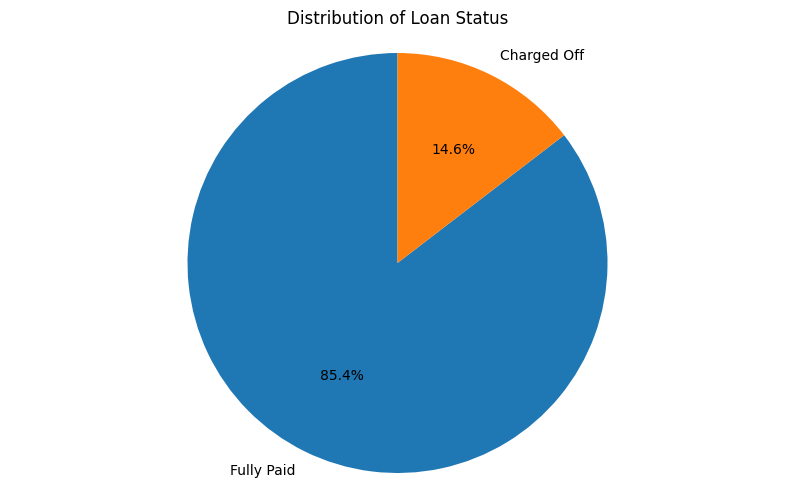

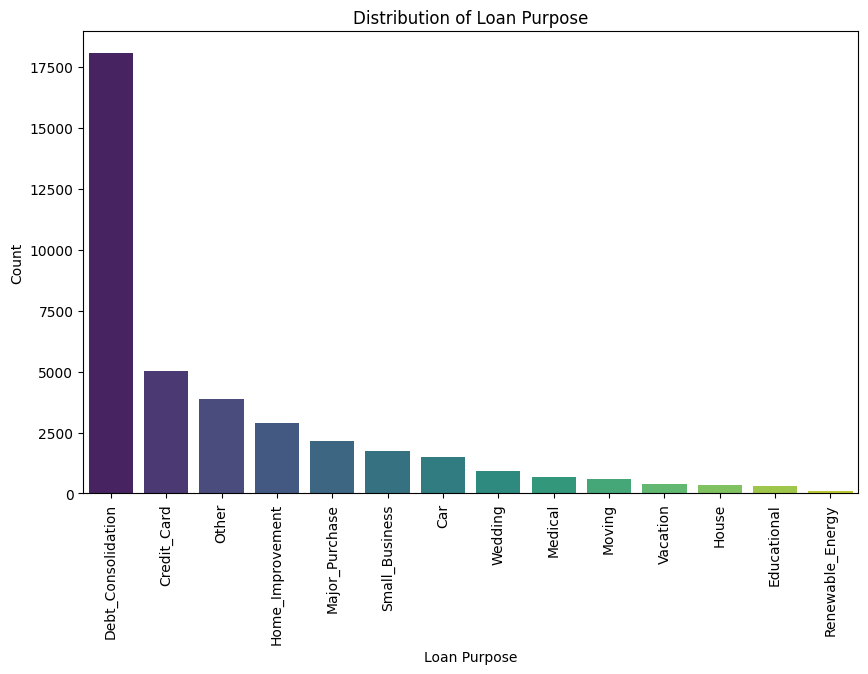

In [15]:
#########################----- Univariate analysis on few columns --------#########################################

#-- loan status
# pie chart of loan status
loan_status_value = df_clean['loan_status'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(loan_status_value, labels=loan_status_value.index,autopct='%1.1f%%', startangle=90)

# adding titles and label
plt.title('Distribution of Loan Status')
plt.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle
plt.show()  # show pie chart

#-- loan purpose
# bar plot of loan purpose
loan_purpose_value = df_clean["purpose"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=loan_purpose_value.index, y=loan_purpose_value.values,hue=loan_purpose_value.index,palette='viridis')

# adding titles and labels
plt.title('Distribution of Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()  # show bar plot


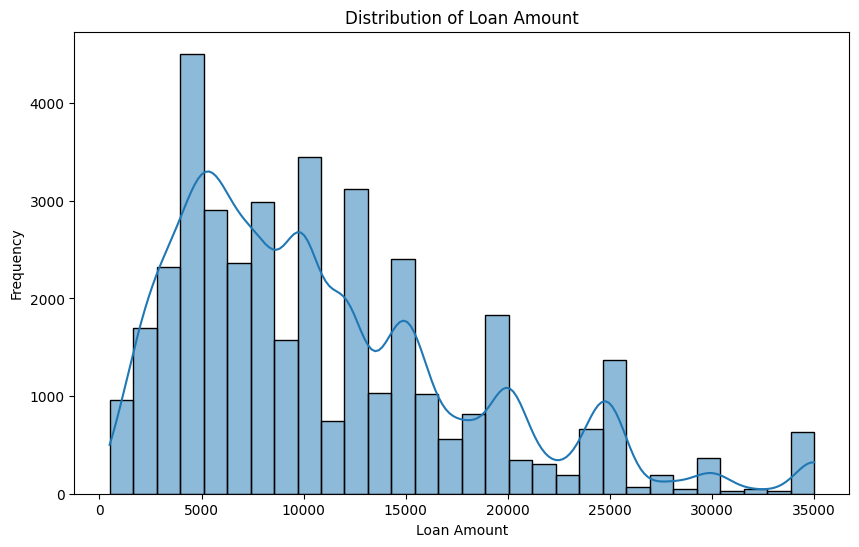

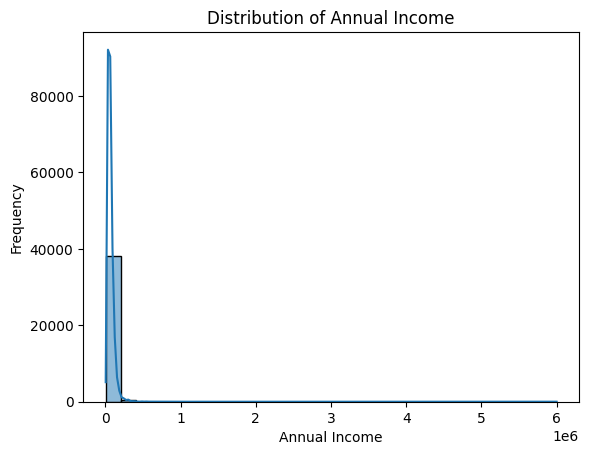

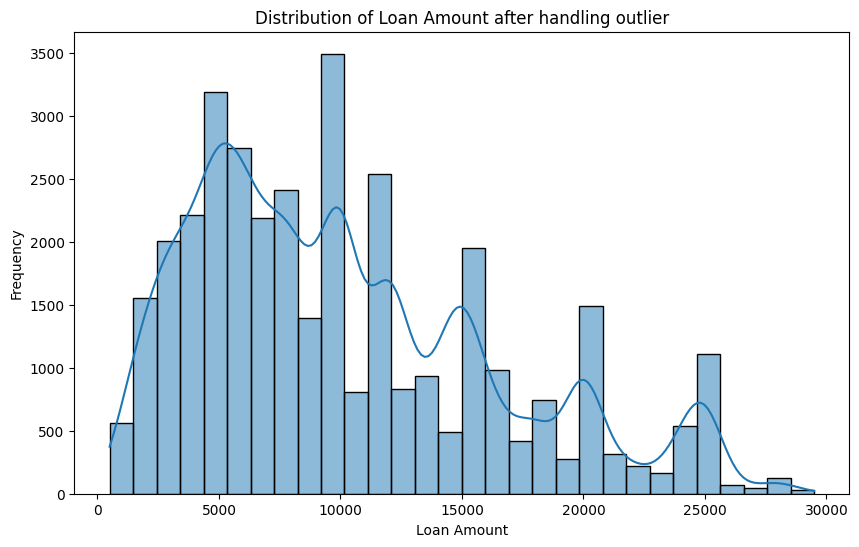

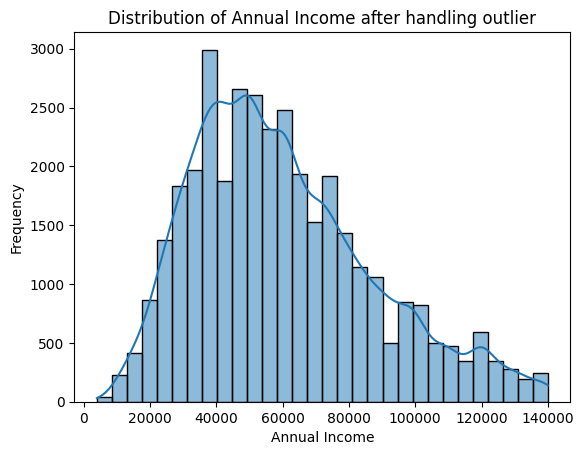

Rows removed: 3889


In [16]:

#----- Analysing loan amount & annual income, checking and handling outliers

# histogram before handling outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['loan_amnt'], bins=30,kde=True)
# adding titles and label
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df_clean['annual_inc'], bins=30,kde=True)
# adding titles and label
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# create a copy of the original dataframe for cleaning
df_cleaned = df_clean.copy()

# process each column to filter out outliers
for col in ['loan_amnt', 'annual_inc']:
    # calculate Q1 and Q3
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    # define lower and upper bounds for outliers
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Filter out outliers directly in df_cleaned
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_limit) & (df_cleaned[col] <= upper_limit)]

# histogram after handling outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['loan_amnt'], bins=30,kde=True)
# adding titles and label
plt.title('Distribution of Loan Amount after handling outlier')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

sns.histplot(df_cleaned['annual_inc'], bins=30,kde=True)
# adding titles and label
plt.title('Distribution of Annual Income after handling outlier')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

# Summary of rows removed
removed_rows = len(df) - len(df_cleaned)
print(f"Rows removed: {removed_rows}")


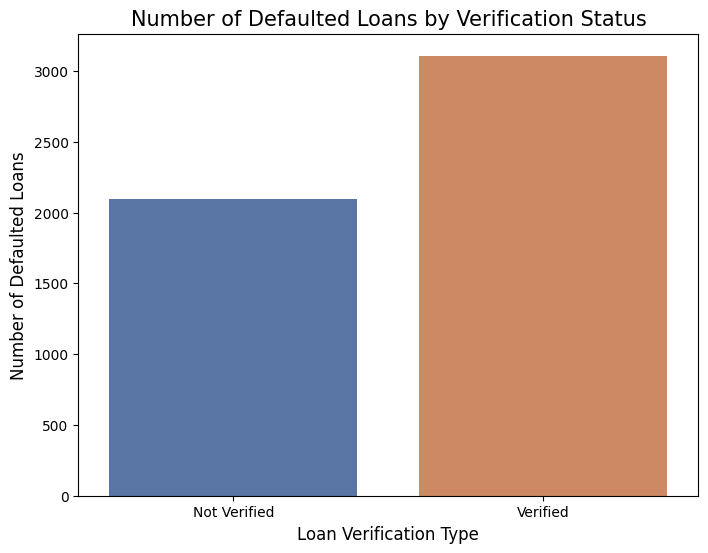

In [17]:
############################---------- BIVARIATE ANALYSIS -------------------------- #########################################

#----- Analysing of loan defaulter (loan_status='Charged  Off') with loan verification status

# merge verification types [merging verification status 'Verified' & 'Source Verified' as 'Verified']
df_cleaned['verification_status'] = df_cleaned['verification_status'].replace({'Verified': 'Verified','Source Verified': 'Verified'})

# grouping the defaulted data by verification status
defaulted_counts = df_cleaned[df_cleaned['loan_status'] == 'Charged Off'].groupby('verification_status').size().reset_index(name='count')

# bar plot to show number of defaulted loan by verification status
plt.figure(figsize=(8, 6))
sns.barplot(data=defaulted_counts, x='verification_status', y='count',hue='verification_status',palette='deep')

# adding titles and label
plt.title('Number of Defaulted Loans by Verification Status', fontsize=15)
plt.xlabel('Loan Verification Type', fontsize=12)
plt.ylabel('Number of Defaulted Loans', fontsize=12)
plt.show()  # show bar plot


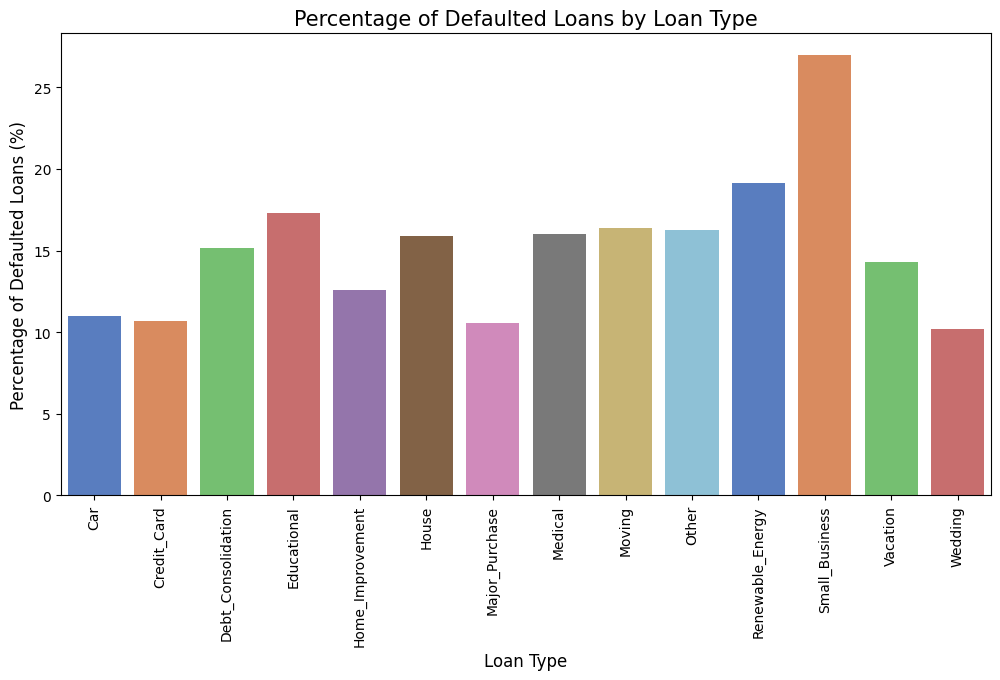

In [18]:
#----- Analysing of loan defaulter (loan_status='Charged  Off') with loan purpose

# calculate percentage of defaulted loans by loan type
percentage_defaulted = df_cleaned.groupby('purpose')['loan_status'].value_counts(normalize=True).unstack().fillna(0)
percentage_defaulted['percentage_defaulted'] = percentage_defaulted['Charged Off'] * 100

# bar plot to show percentage of loan default by loan purpose
plt.figure(figsize=(12, 6))
sns.barplot(data=percentage_defaulted.reset_index(), x='purpose', y='percentage_defaulted',hue='purpose',palette='muted')

# adding titles and label
plt.title('Percentage of Defaulted Loans by Loan Type', fontsize=15)
plt.xlabel('Loan Type', fontsize=12)
plt.ylabel('Percentage of Defaulted Loans (%)', fontsize=12)
plt.xticks(rotation=90)
plt.show()  # show bar plot


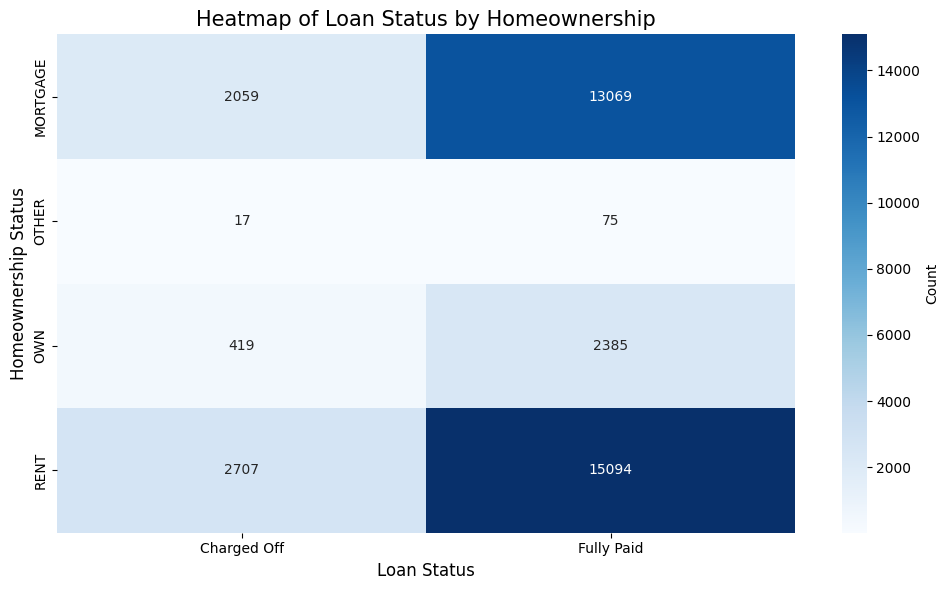

In [19]:
#----- Analysing of loan status with home ownership

# filtering dataset by removing all the rows with home ownership as NONE
df_cleaned = df_cleaned[df_cleaned['home_ownership'] != 'NONE']

# group by home ownership and loan status
heatmap_value = df_cleaned.groupby(['home_ownership', 'loan_status']).size().unstack(fill_value=0)

# plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_value, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})

# adding titles and labels
plt.title('Heatmap of Loan Status by Homeownership', fontsize=15)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Homeownership Status', fontsize=12)
plt.tight_layout()
plt.show()  # show heatmap

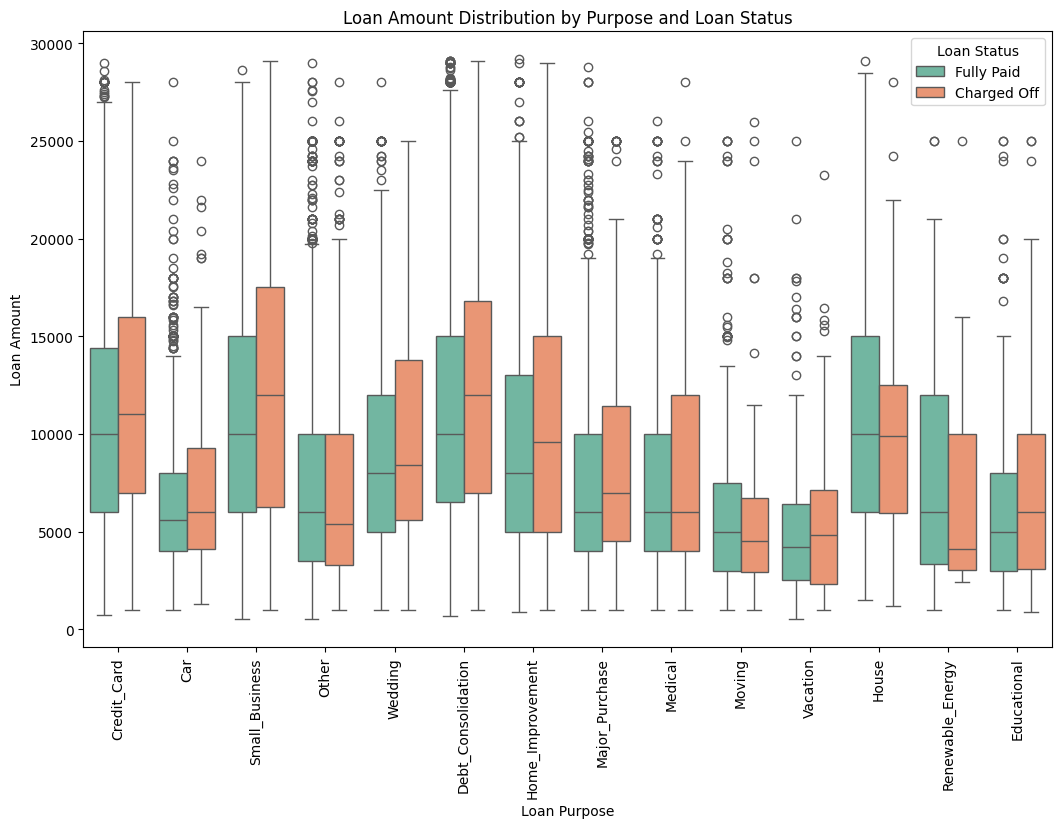

4


In [20]:
############### MULTIVARIATE ANALYSIS ##################

## ------------ Analyzing Loan Amount Distribution by Purpose and Loan Status ---------------- ##

Q1 = df['loan_amnt'].quantile(0.25)
Q3 = df['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Remove outliers
df_cleaned_LA = df_cleaned[(df_cleaned['loan_amnt'] >= lower_bound) & (df_cleaned['loan_amnt'] <= upper_bound)]

plt.figure(figsize=(12.5, 8))
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data=df_cleaned_LA, palette='Set2')
plt.title('Loan Amount Distribution by Purpose and Loan Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Loan Amount')
plt.xticks(rotation=90)
plt.legend(title='Loan Status')
plt.show()
#print(len(df_cleaned)-len(df_cleaned_LA))

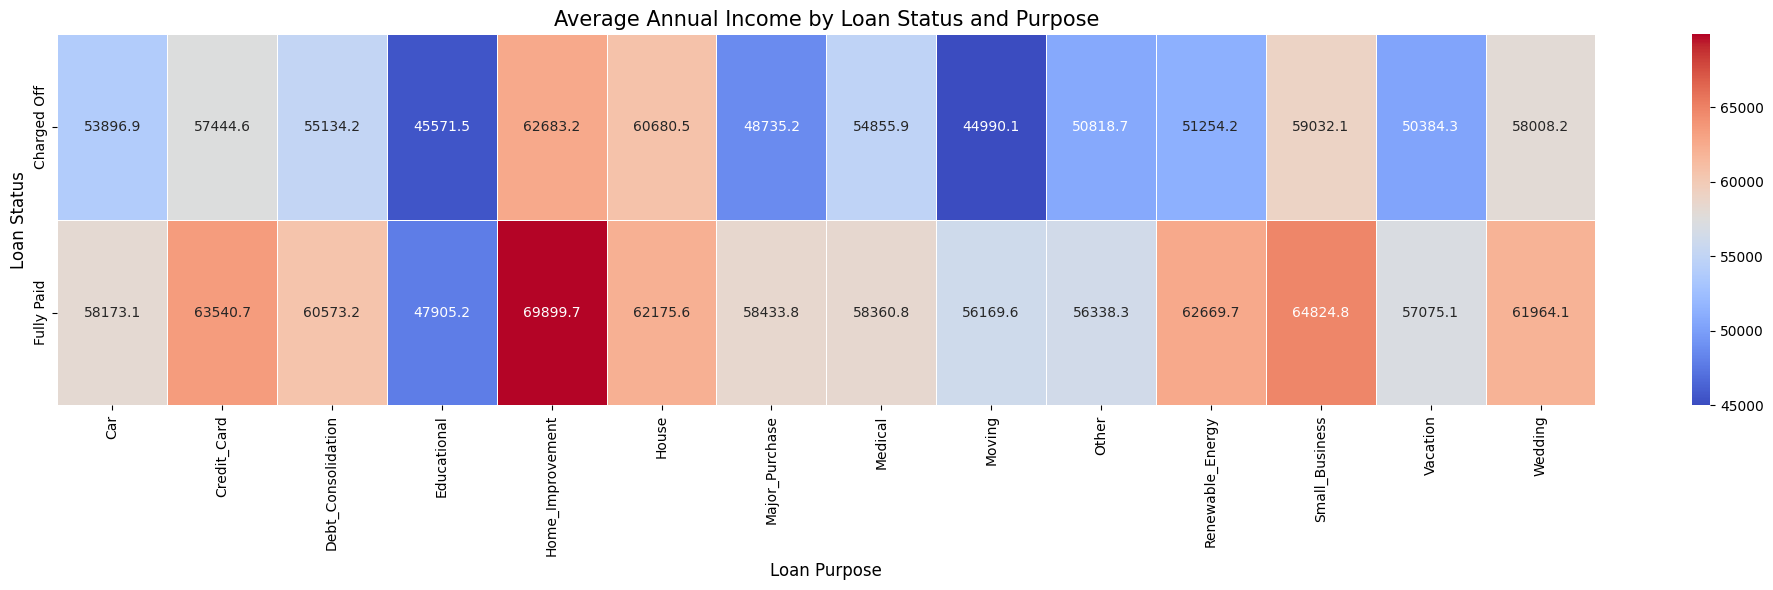

In [21]:
#----- Analysing of loan status with annual income and loan purpose

# group by loan status, loan purpose & annual income, also getting the average of annual income
heatmap_value = df_cleaned.groupby(['loan_status', 'purpose'])['annual_inc'].mean().unstack()

# plotting heatmap
plt.figure(figsize=(20, 6))
sns.heatmap(heatmap_value, annot=True, fmt="1.1f", cmap='coolwarm', linewidths=.5)

# adding titles and labels
plt.title('Average Annual Income by Loan Status and Purpose', fontsize=15)
plt.xlabel('Loan Purpose', fontsize=12)
plt.ylabel('Loan Status', fontsize=12)
plt.tight_layout()
plt.show()  # show plot
